## **Linear Regression**
We will use Linear regression for predicting house prices



In [19]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **Dataset Preparation**

In [20]:
# Execute this cell for loading dataset in a pandas dataframe


df = pd.read_csv("/content/sample_data/california_housing_train.csv")


data_df = df.copy()

In [21]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


The last step is to make train and test dataset and to create seperate vector for price

In [23]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0) #normalization

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T

print(x_train.shape,y_train.shape)

(17000, 8) (17000,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [24]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MSE loss
  """
  mse = np.sqrt(np.mean(y_pred-y_true)**2)

  return mse

In [25]:
def y_prediction(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b

  assert(y_pred.shape == (m,))
  return y_pred

In [29]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y_prediction(x,a,b)


  # Compute gradient for weights a as da
  da = np.dot(x.T,yp-y_true)/m


  # Compute gradients for bias b as db
  db = np.sum(yp-y_true)/m

  assert(da.shape ==(n,))
  return (da,db)

In [34]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    da,db = gradient(x,a,b,y_true)

    # apply gradient descent now to update a and b
    a = a - learning_rate*da
    b = b - learning_rate*db

    # calculate loss at this point using loss() function
    l_mse = loss(y_prediction(x,a,b), y_true)

    # Store loss in the list loss_mse
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse) #print l_mse


  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [39]:
epochs = 300             # tweak this!!!
learn_rate = 0.05        # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)
print(train_loss)

Epoch  1  Completed! loss =  196935.8667352941
Epoch  2  Completed! loss =  187089.07339852938
Epoch  3  Completed! loss =  177734.61972860293
Epoch  4  Completed! loss =  168847.88874217277
Epoch  5  Completed! loss =  160405.49430506417
Epoch  6  Completed! loss =  152385.21958981093
Epoch  7  Completed! loss =  144765.95861032038
Epoch  8  Completed! loss =  137527.66067980436
Epoch  9  Completed! loss =  130651.27764581415
Epoch  10  Completed! loss =  124118.71376352344
Epoch  11  Completed! loss =  117912.77807534728
Epoch  12  Completed! loss =  112017.13917157988
Epoch  13  Completed! loss =  106416.28221300089
Epoch  14  Completed! loss =  101095.46810235085
Epoch  15  Completed! loss =  96040.69469723331
Epoch  16  Completed! loss =  91238.65996237166
Epoch  17  Completed! loss =  86676.72696425307
Epoch  18  Completed! loss =  82342.89061604041
Epoch  19  Completed! loss =  78225.74608523838
Epoch  20  Completed! loss =  74314.45878097646
Epoch  21  Completed! loss =  70598.

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  0.043021227727479794


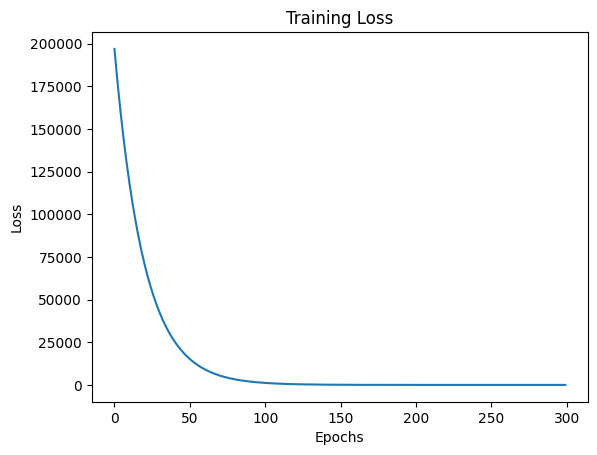

In [41]:
test_df = pd.read_csv("/content/sample_data/california_housing_train.csv")

arr = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
test_loss = loss(y_prediction(x_test,a,b), y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot([i for i in range(epochs)], train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

That's it you have completed the assignment !!

We hope that you learned something from this exercise


# **QUESTION 1 **

In [1]:
from google.colab import files
uploaded = files.upload()

Saving img4.png to img4.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

array([[ 58,  58,  58, ...,  53,  53,  53],
       [ 58,  58,  58, ...,  53,  53,  53],
       [ 58,  58,  58, ...,  53,  53,  53],
       ...,
       [ 83,  83,  83, ..., 121, 131, 132],
       [ 85,  85,  85, ..., 126, 135, 135],
       [ 86,  86,  86, ..., 133, 135, 138]], dtype=uint8)
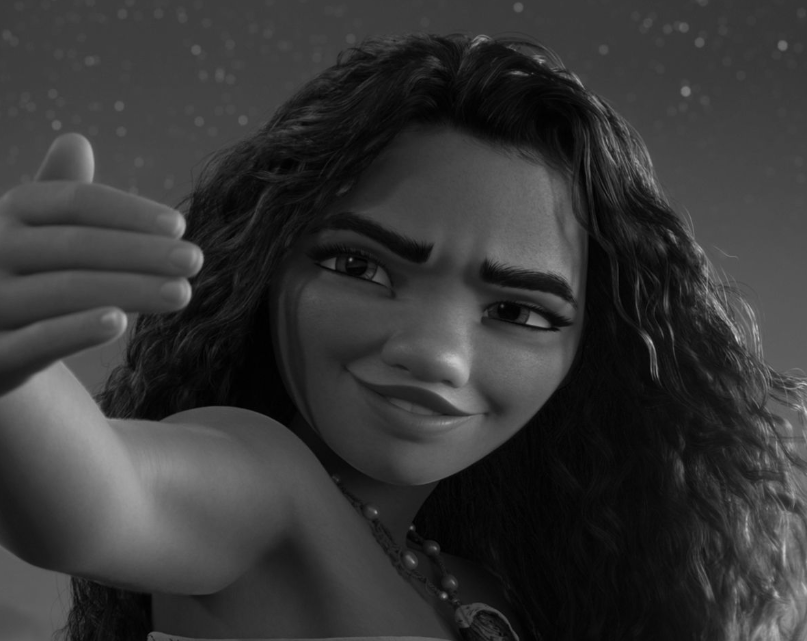

In [14]:
img = cv2.imread('img4.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

In [4]:
def convolve(image, kernel, strides):
  m,n = image.shape
  k,l = kernel.shape
  convolved_image = np.zeros((int(m-k/strides+1),int(n-l/strides+1)))
  for i in range(0,m-k+1,strides):
    for j in range(0,n-l+1,strides):
      convolved_image[int(i/strides),int(j/strides)] = np.sum(image[i:i+k,j:j+l]*kernel)
  return convolved_image



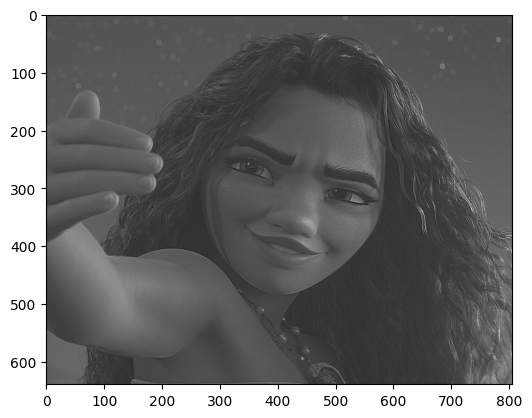

In [15]:
#sharpening an image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened_img = convolve(gray,kernel,1)
plt.imshow(sharpened_img,cmap='gray')

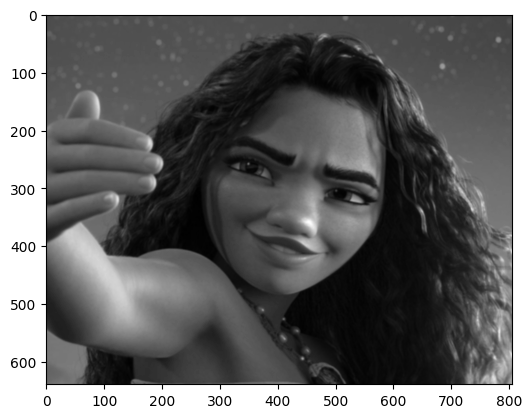

In [16]:
#blurring an image
kernel = np.ones((3,3))/9
blurr_img = convolve(gray,kernel,1)
plt.imshow(blurr_img, cmap='gray')

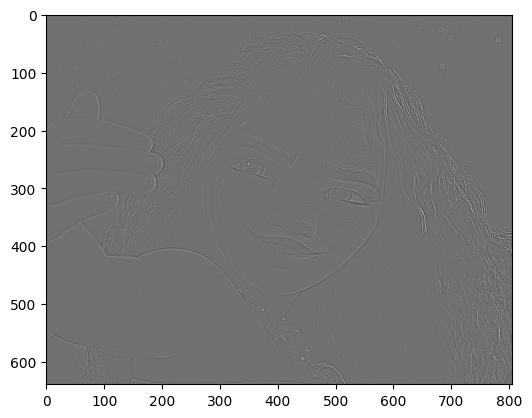

In [18]:
#highlighting the edges
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
edged_img = convolve(gray,kernel,1)
plt.imshow(edged_img,cmap='gray')